In [1]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
#Einlesen der Trainingsdaten Nummer 1
dataset = panda.read_csv("training3.csv", sep=";")
dataset

,tweet,classification
0,"@corinnamilborn Liebe Corinna, wir würden dich...",0
1,@Martin28a Sie haben ja auch Recht. Unser Twee...,0
2,@ahrens_theo fröhlicher gruß aus der schönsten...,0
3,@dushanwegner Amis hätten alles und jeden gewä...,0
4,@spdde kein verläßlicher Verhandlungspartner. ...,1
...,...,...
5004,Gegens. Zul. zu Patenamt &amp; gegenseitige An...,0
5005,"@GlasenappHenrik Zu Merkel fällt mir nur ein, ...",1
5006,@KokoLores20 @krippmarie Ein richtiges Zeichen...,1
5007,"@Hartes_Geld ,Honecker‘Merkel macht uns zur ,D...",1


In [3]:
# Hinzufügen der Spalte Text length und berechnen der Tweetlänge
dataset['text length'] = dataset['tweet'].apply(len)
print(dataset.head())

                                               tweet  classification  \
0  @corinnamilborn Liebe Corinna, wir würden dich...               0   
1  @Martin28a Sie haben ja auch Recht. Unser Twee...               0   
2  @ahrens_theo fröhlicher gruß aus der schönsten...               0   
3  @dushanwegner Amis hätten alles und jeden gewä...               0   
4  @spdde kein verläßlicher Verhandlungspartner. ...               1   

   text length  
0          109  
1          142  
2           69  
3          140  
4          136  


In [4]:
# anlegen der Variable "tweet"
tweet=dataset.tweet

In [5]:
"""import os
import codecs
import emoji

from nltk.tokenize import word_tokenize

def extract_emojis(token):
    emoji_list = []
    if token in emoji.UNICODE_EMOJI:
        emoji_list.append(token)
    return emoji_list

for tweet in os.listdir(tweets_path):
    with codecs.open(tweets_path+tweet, 'r', encoding='utf-8') as input_file:
        line = panda.read_csv("training3.csv", sep=";")
        while line:
            line = word_tokenize(line)
            for token in line:
    print extract_emojis(token)

            line = panda.read_csv("training3.csv", sep=";")
            
            
            ------

import emoji
from emoji import UNICODE_EMOJI

#getting all emojis as lists
all_emojis = list(UNICODE_EMOJI.keys())

#defining sentence
sentence = "schuld van de sossen 😡 SP.a: wij hebben niks gedaan 😴 Groen: we gaan energie VERBIEDEN!"

#getting Emoji Count
emoji_count = sum([sentence.count(emoj) for emoj in UNICODE_EMOJI])
#listing all Emojis
listed_emojis = ','.join(re.findall(f"[{''.join(all_emojis)}]", str(sentence)))
#listing all Emoji Types
emoji_types = ','.join([UNICODE_EMOJI[detect_emoji].upper()[1:-1] for detect_emoji in listed_emojis.split(',')])

#Displaying Sentence, Emoji Count, Emojis and Emoji Types
print(f"Sentence: {sentence}\nListed Emojis: {listed_emojis}\nCount: {emoji_count}\nEmoji Types: {emoji_types}")"""

'import os\nimport codecs\nimport emoji\n\nfrom nltk.tokenize import word_tokenize\n\ndef extract_emojis(token):\n    emoji_list = []\n    if token in emoji.UNICODE_EMOJI:\n        emoji_list.append(token)\n    return emoji_list\n\nfor tweet in os.listdir(tweets_path):\n    with codecs.open(tweets_path+tweet, \'r\', encoding=\'utf-8\') as input_file:\n        line = panda.read_csv("training3.csv", sep=";")\n        while line:\n            line = word_tokenize(line)\n            for token in line:\n    print extract_emojis(token)\n\n            line = panda.read_csv("training3.csv", sep=";")\n            \n            \n            ------\n\nimport emoji\nfrom emoji import UNICODE_EMOJI\n\n#getting all emojis as lists\nall_emojis = list(UNICODE_EMOJI.keys())\n\n#defining sentence\nsentence = "schuld van de sossen 😡 SP.a: wij hebben niks gedaan 😴 Groen: we gaan energie VERBIEDEN!"\n\n#getting Emoji Count\nemoji_count = sum([sentence.count(emoj) for emoj in UNICODE_EMOJI])\n#listing all 

In [6]:
## PREPROCESSING

#Implementation der deutschen Stoppwortliste via NLTK
stopwords = nltk.corpus.stopwords.words("german")

#Erweitern der Liste
other_exclusions = ["rt", "aber", "alle", "allem", "allen", "aller", "alles", "als", "also", "am", "an", "ander", "andere", "anderem", "anderen", "anderer", "anderes", "anderm", "andern", "anderr", 
                  "anders", "auch", "auf", 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 
                  'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies',
                  'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges',
                  'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin',
                  'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euch', 'im', 'in', 'indem', 'ins', 'ist', 'jede', 'jedem', 'jeden', 'jeder', 'jedes', 'jene', 'jenem',
                  'jenen', 'jener', 'jenes', 'jetzt', 'kann', 'kein', 'keine', 'keinem', 'keinen', 'keiner', 'keines', 'können', 'könnte', 'machen', 'man', 'manche', 'manchem', 'manchen', 'mancher', 
                  'manches', 'mein', 'meine', 'meinem', 'meinen', 'meiner', 'meines', 'mit', 'muss', 'musste', 'nach', 'nicht', 'nichts', 'noch', 'nun', 'nur', 'ob', 'oder', 'ohne', 'sehr', 'sein', 
                  'seine', 'seinem', 'seinen', 'seiner', 'seines', 'selbst', 'sich', 'sie', 'ihnen', 'sind', 'so', 'solche', 'solchem', 'solchen', 'solcher', 'solches', 'soll', 'sollte', 'sondern',
                  'sonst', 'über', 'um', 'und', 'uns', 'unsere', 'unserem', 'unseren', 'unser', 'unseres', 'unter', 'viel', 'vom', 'von', 'vor', 'während', 'war', 'waren', 'warst', 'was', 'weg', 'weil',
                  'weiter', 'welche', 'welchem', 'welchen', 'welcher', 'welches', 'wenn', 'werde', 'werden', 'wie', 'wieder', 'will', 'wir', 'wird', 'wirst', 'wo', 'wollen', 'wollte', 'würde', 'würden',
                  'zu', 'zum', 'zur', 'zwar', 'zwischen', "ja", "mehr", "warum", "wäre", "geht", "mal", "wer", "macht"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

## 1. Entfernen von Satzzeichen, Sonderzeichen und lowercase transformation
def preprocess(tweet):  
    
    # entfernen von Extra Leerzeichen
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # Entfernen von Usernames @'s
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # Entfernen von URLS
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # Entfernen von Satzzeichen
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # Entfernen von Leerzeichen
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # Entfernen von Leerzeichen am Anfang des Tweets/Ende
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # Ersetzen von Nummern mit "numbr"
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # Entfernen von Großschreibung
    tweet_lower = newtweet.str.lower()
    
## 2: Tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
## 3: Entfernen von Stoppwörtern
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
## 4: Stemmen der Tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

#Festlegen der Variable processed_tweets zum einfacheren Workflow
processed_tweets = preprocess(tweet)   

dataset['processed_tweets'] = processed_tweets
#Ausgabe der Preprocess Ergebnisse
print(dataset[["tweet","processed_tweets"]].head(10))

                                               tweet  \
0  @corinnamilborn Liebe Corinna, wir würden dich...   
1  @Martin28a Sie haben ja auch Recht. Unser Twee...   
2  @ahrens_theo fröhlicher gruß aus der schönsten...   
3  @dushanwegner Amis hätten alles und jeden gewä...   
4  @spdde kein verläßlicher Verhandlungspartner. ...   
5  @Dirki_M Ja, aber wo widersprechen die Zahlen ...   
6  @milenahanm 33 bis 45 habe ich noch gar nicht ...   
7  @jayxderxmensch @jayxthexhuman Wieso? Was find...   
8  @tagesschau Euere AfD Hetze wirkt. Da könnt ih...   
9  Deutsche Medien, Halbwahrheiten und einseitige...   

                                    processed_tweets  
0  lieb corinna w rden gern moderatorin f r gewin...  
1  recht tweet missverst ndlich bverfg sachleistu...  
2           fr hlicher gru sch nsten stadt welt theo  
3  ami h tten gew hlt hillari wollten fortsetzung...  
4  verl licher verhandlungspartn nachkarteln sond...  
5  widersprechen zahlen denen verlinkten artikel ... 

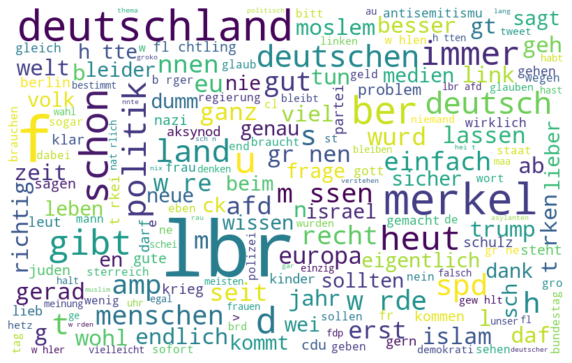

In [7]:
# WordCloud aller Tweets
from wordcloud import WordCloud
all_words = ' '.join([text for text in dataset['processed_tweets'] ]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)
random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

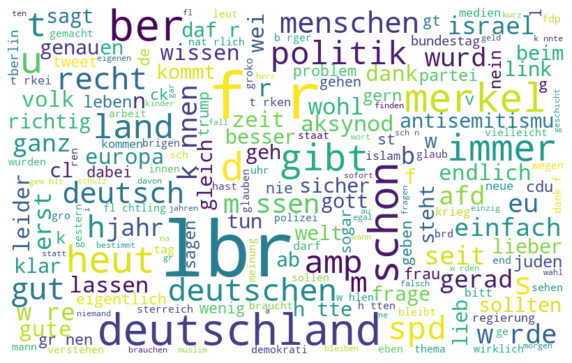

In [8]:
# WordCLoud für die Wörter der Klassifikation "OTHER"
hatred_words = ' '.join([text for text in dataset['processed_tweets'][dataset['classification'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110, stopwords=stopwords, background_color="white").generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

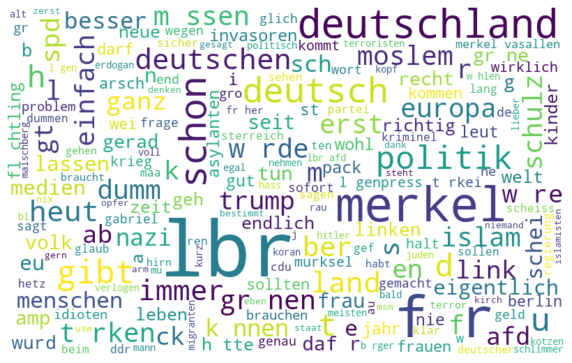

In [9]:
# WordCLoud für die Wörter der Klassifikation "OFFENSIVE"
offensive_words = ' '.join([text for text in dataset['processed_tweets'][dataset['classification'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110, stopwords=stopwords, background_color="white").generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
#TF-IDF Features-F1
# Unigrams & Bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix erstellen
tfidf = tfidf_vectorizer.fit_transform(dataset['processed_tweets'] )
tfidf

<5009x2092 sparse matrix of type '<class 'numpy.float64'>'
	with 33286 stored elements in Compressed Sparse Row format>

In [11]:
#Logistic Regression Modell
# Spezifizieren von "random_state", weil der Code sonst bei jedem Run eine neue Nummer generiert und man dann in train und test ständig neue Ergebnisse bekommt 
X = tfidf
y = dataset['classification'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       667
           1       0.75      0.31      0.44       335

    accuracy                           0.73      1002
   macro avg       0.74      0.63      0.63      1002
weighted avg       0.74      0.73      0.70      1002

Logistic Regression, Accuracy Score: 0.7345309381237525


In [12]:
#Random Forest Modell
#selbiges mit Random_State
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.75      0.91      0.83       667
           1       0.70      0.41      0.51       335

    accuracy                           0.74      1002
   macro avg       0.73      0.66      0.67      1002
weighted avg       0.74      0.74      0.72      1002

Random Forest, Accuracy Score: 0.7435129740518962


In [13]:
#Naive Bayes Modell
#selbiges mit Random_State
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.78      0.42      0.54       667
           1       0.40      0.76      0.52       335

    accuracy                           0.53      1002
   macro avg       0.59      0.59      0.53      1002
weighted avg       0.65      0.53      0.53      1002

Naive Bayes, Accuracy Score: 0.530938123752495


In [14]:
#Support Vektor Maschine
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       667
           1       0.67      0.50      0.57       335

    accuracy                           0.75      1002
   macro avg       0.72      0.69      0.70      1002
weighted avg       0.74      0.75      0.74      1002

SVM, Accuracy Score: 0.7504990019960079


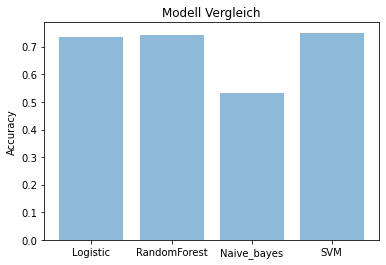

In [15]:
# Vergleich der accuracy der 4 Modelle
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Modell Vergleich')
plt.show()

In [21]:
## STARTEN DER SENTIMENT ANALYSE
# nltk.download('vader_lexicon')
sentiment_analyzer = VS()
#Auszählen der Tags und bewerten nach Klassifizierung
def count_tags(tweet_c): 
    
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

# definieren von 3 Segemnten 
def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    #features = pandas.DataFrame(features)
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

final_features = sentiment_analysis_array(tweet)
#final_features

# Negativ = vorkommen vom geparsten Text in OFFENSIVE, Neutral = vorkommen vom Geparsten Text in OTHER 
new_features = panda.DataFrame({'Neg':final_features[:,0],'Neutral':final_features[:,1],'Compound':final_features[:,2],
                            'url_tag':final_features[:,3],'mention_tag':final_features[:,4],'hash_tag':final_features[:,5]})
new_features

,Neg,Neutral,Compound,url_tag,mention_tag,hash_tag
0,0.000,1.000,0.0000,0.0,1.0,0.0
1,0.178,0.822,-0.5994,0.0,1.0,0.0
2,0.000,1.000,0.0000,0.0,1.0,0.0
3,0.000,1.000,0.0000,0.0,1.0,0.0
4,0.218,0.782,-0.5994,0.0,1.0,1.0
...,...,...,...,...,...,...
5004,0.000,1.000,0.0000,0.0,0.0,3.0
5005,0.000,1.000,0.0000,0.0,1.0,0.0
5006,0.000,1.000,0.0000,0.0,2.0,0.0
5007,0.119,0.881,-0.5994,0.0,1.0,0.0


In [22]:
# F2-Conctaenation of tf-idf scores and sentiment scores
tfidf_a = tfidf.toarray()
modelling_features = np.concatenate([tfidf_a,final_features],axis=1)
modelling_features.shape

(5009, 2098)

In [23]:
# Logistic Regression mit extracted Features

X = panda.DataFrame(modelling_features)
y = dataset['classification'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression,Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       667
           1       0.73      0.34      0.46       335

    accuracy                           0.74      1002
   macro avg       0.74      0.64      0.64      1002
weighted avg       0.74      0.74      0.70      1002

Logistic Regression,Accuracy Score: 0.7375249500998003


G:\Program Files (x86)\Neuer Ordner\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Random FOrest Modell mit extracted features
X = panda.DataFrame(modelling_features)
y = dataset['classification'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_preds = rf.predict(X_test_bow)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       667
           1       0.69      0.39      0.50       335

    accuracy                           0.74      1002
   macro avg       0.72      0.65      0.66      1002
weighted avg       0.73      0.74      0.71      1002

Random Forest, Accuracy Score: 0.7365269461077845


In [25]:
# Naive Bayes Modell mit extracted features
X = panda.DataFrame(modelling_features)
y = dataset['classification'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_bow,y_train)
y_preds = nb.predict(X_test_bow)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.78      0.48      0.59       667
           1       0.41      0.73      0.53       335

    accuracy                           0.56      1002
   macro avg       0.60      0.60      0.56      1002
weighted avg       0.66      0.56      0.57      1002

Naive Bayes, Accuracy Score: 0.563872255489022


In [26]:
# Support Vector Maschine mit extracted features
X = panda.DataFrame(modelling_features)
y = dataset['classification'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_bow,y_train)
y_preds = support.predict(X_test_bow)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       667
           1       0.67      0.51      0.58       335

    accuracy                           0.75      1002
   macro avg       0.73      0.69      0.70      1002
weighted avg       0.74      0.75      0.74      1002

SVM, Accuracy Score: 0.7524950099800399


G:\Program Files (x86)\Neuer Ordner\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


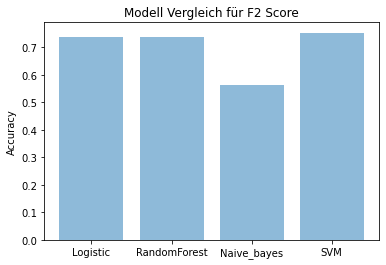

In [27]:
# Vergleich der 4 Modelle auf F2
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Modell Vergleich für F2 Score')
plt.show()

In [28]:

exp = re.findall(r"[A-Za-z]+[*][*]+", str(tweet), re.MULTILINE)
print(exp)

zensiert = re.findall(r"[*]+[A-Za-z]+[*]+", str(tweet), re.MULTILINE)
print(zensiert)

[]
[]


In [29]:
# Generieren von doc2vec
# Initialisieren & trainieren des Modells

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#Input für doc2vec ist: (['list','of','word'], [TAG_001]). 
#Benutzung der Index der Sätze als Tags
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(dataset["processed_tweets"].apply(lambda x: x.split(" ")))]

# trainieren des Modells mit unseren Daten
# window- maximale Distanz zwischen aktuellem und predicted Wort innerhalb eines Satzes
# mincount- ignoriert alle Wörter mit einer absoluten Frequenz, die niedriger als die festgelegte ist
# workers - ANzahl der "worker threads" die das Modell trainieren
#  Training Model - distributed bag of words (PV-DBOW) wird verwendet
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

#infer_vector - Schlussfolgern von Vektoren basierend auf dem trainings Dokument 
# Syntax- infer_vector(doc_words, alpha=None, min_alpha=None, epochs=None, steps=None)
# doc_words- Dokument für welches die Vektor Repräsentation geschlussfolgert wird

# alle Dokumente in Vektoren transformieren
doc2vec_df = dataset["processed_tweets"].apply(lambda x: model.infer_vector(x.split(" "))).apply(panda.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
doc2vec_df

,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,-0.027387,0.107461,0.059363,-0.026500,-0.015513
1,0.003852,0.091054,0.095831,0.041451,0.097245
2,0.038631,-0.042100,0.049631,0.049836,0.101913
3,-0.034273,-0.050297,0.029398,0.012819,0.137619
4,-0.030357,0.024688,-0.085910,-0.040291,0.079108
...,...,...,...,...,...
5004,0.093198,0.059424,-0.084310,-0.079595,0.016427
5005,0.047479,0.022911,-0.021010,-0.007545,0.122554
5006,-0.085234,-0.010844,-0.102470,0.029940,0.113089
5007,-0.022079,0.099154,-0.097397,0.029214,0.068711


In [30]:
# Verketten der TF-IDF Scores mit den doc2vex Ergebnissen
modelling_features = np.concatenate([tfidf_a,final_features,doc2vec_df],axis=1)
modelling_features.shape

(5009, 2103)

In [31]:
# Logistic Regression Modell mit TFIDF, sentiment Analyse & doc2vec
X = panda.DataFrame(modelling_features)
y = dataset['classification'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       667
           1       0.74      0.33      0.45       335

    accuracy                           0.74      1002
   macro avg       0.74      0.63      0.64      1002
weighted avg       0.74      0.74      0.70      1002

Logistic Regression, Accuracy Score: 0.7365269461077845


G:\Program Files (x86)\Neuer Ordner\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Random Forest Modell mit TFIDF, sentiment Analyse & doc2vec
X = panda.DataFrame(modelling_features)
y = dataset['classification'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_preds = rf.predict(X_test_bow)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       667
           1       0.77      0.29      0.42       335

    accuracy                           0.73      1002
   macro avg       0.75      0.62      0.62      1002
weighted avg       0.74      0.73      0.69      1002

Random Forest, Accuracy Score: 0.7325349301397206


In [33]:
# Naive Bayes Modell mit TFIDF, sentiment Analyse & doc2vec
X = panda.DataFrame(modelling_features)
y = dataset['classification'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train,y_train)
y_preds = nb.predict(X_test)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.78      0.48      0.59       667
           1       0.41      0.73      0.53       335

    accuracy                           0.56      1002
   macro avg       0.60      0.60      0.56      1002
weighted avg       0.66      0.56      0.57      1002

Naive Bayes, Accuracy Score: 0.563872255489022


In [34]:
#Support Vector Maschine mit TFIDF, sentiment Analyse & doc2vec
X = panda.DataFrame(modelling_features)
y = dataset['classification'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_bow,y_train)
y_preds = support.predict(X_test_bow)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       667
           1       0.66      0.49      0.57       335

    accuracy                           0.75      1002
   macro avg       0.72      0.68      0.69      1002
weighted avg       0.74      0.75      0.74      1002

SVM, Accuracy Score: 0.7465069860279441


G:\Program Files (x86)\Neuer Ordner\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


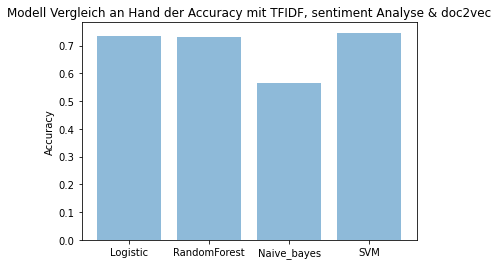

In [35]:
# Vergleich der 4 Modelle
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Modell Vergleich an Hand der Accuracy mit TFIDF, sentiment Analyse & doc2vec')
plt.show()